<a href="https://colab.research.google.com/github/GeorgeKMaina/stroke-health-care-analysis/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STROKE RISK FACTORS**

## Importing Libraries and Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Loading our dataset
healthdata=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
healthdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Checking the data

In [6]:
# Determining the no. of records in our dataset
healthdata.shape

(5110, 12)

Our dataset has 5110 rows and 12 columns.


In [7]:
# previewing the top of our dataset
healthdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# previewing the bottom of our dataset
healthdata.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
# Checking whether each column has an appropriate datatype
healthdata.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Tidying the dataset

### Renaming columns

Using the same pattern for column names, i.e. using lower case and '_' to make a single word for two-word columns.

In [10]:
# Using the same format for all column names by:
# Renaming the columns to combine the names of the columns into a single word and lowering the case

healthdata.columns = healthdata.columns.str.lower().str.replace(' ', '_')

### Identifying uniques values within the dataset for each column.

In [11]:
# Are there any unique values in each column entry in the dataset?
for i in healthdata.columns:
 print(healthdata[i].unique())
 print ("\n")

[ 9046 51676 31112 ... 19723 37544 44679]


['Male' 'Female' 'Other']


[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-

### Dropping Irrelevant Fields

In [13]:
# Dropping irrelevant fields
healthdata.drop(columns =['id'],inplace = True)
healthdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Missing values

Identifying and dealing with missing values within the dataset.

In [14]:
# Determining the number of items in each column and the data type of each column
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [15]:
# Identifying the Missing Data.
healthdata.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
# Dropping any rows that have a missing or null values because they may cause inconsistencies.
healthdata.dropna(inplace = True)
# Checking if there are any null values.
healthdata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Outliers

(4909, 11)


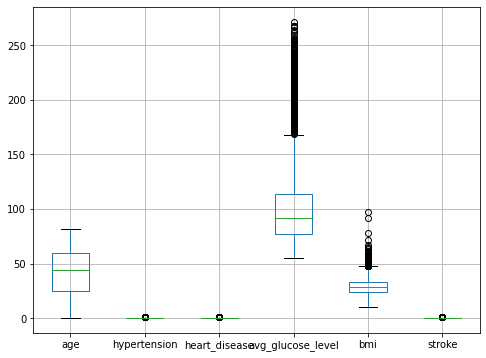

In [60]:
# checking for outliers 
healthdata.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(healthdata.shape)

In [61]:
# Checking for outliers in the glucose level column

Q1 = healthdata.avg_glucose_level.quantile(0.25)
Q3 = healthdata.avg_glucose_level.quantile(0.75)

IQR = Q3 - Q1

outliers = ((healthdata.avg_glucose_level < Q1 - 1.5 * IQR) | (healthdata.avg_glucose_level > Q3 + 1.5 * IQR))
outliers.value_counts()

False    4342
True      567
Name: avg_glucose_level, dtype: int64

In [62]:
# Checking for outliers in the bmi column

Q1 = healthdata.bmi.quantile(0.25)
Q3 = healthdata.bmi.quantile(0.75)

IQR = Q3 - Q1

outliers = ((healthdata.bmi < Q1 - 1.5 * IQR) | (healthdata.bmi > Q3 + 1.5 * IQR))
outliers.value_counts()

False    4799
True      110
Name: bmi, dtype: int64

There are outliers in the bmi and glucose columns.However, removing the outliers would result in an inconclusive result because they could still be viable submissions.

### Anomalies

In [ ]:
# Checking for Anomalies
# There were no anomalies within our dataset 
# However, we removed the Id column because we determined that it would not be
# useful for our research.

## Exploratory Data Analysis

### Univariate Analysis

#### Frequency Tables

In [25]:
# Creating a Frequency table of column type of gender categories 
# and using the value_counts() function
healthdata.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There are more female respondents than male within our dataset.

In [26]:
# Creating a Frequency table of column type of work type categories 
# and using the value_counts() function
healthdata.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

Majority of the respondents work in the private sector.

In [27]:
# Creating a Frequency table of column type of ever married categories 
# and using the value_counts() function
healthdata.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

Most of the respondents were married.

In [28]:
# Creating a Frequency table of column type of residence type categories 
# and using the value_counts() function
healthdata.residence_type.value_counts()

Urban    2490
Rural    2419
Name: residence_type, dtype: int64

Most of the respondents live in urban areas but the difference was not that large from those who live in rural areas.

In [29]:
# Creating a Frequency table of column type of smoking status categories 
# and using the value_counts() function
healthdata.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

Most of the respondents never smoked

In [30]:
healthdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


#### Pie chart

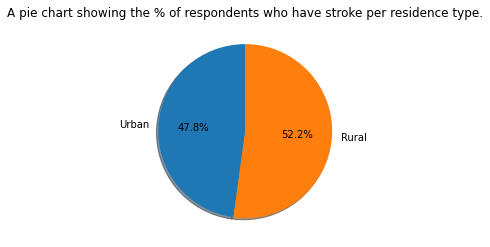

In [34]:
# Creating a pie chart that illustrates the number of people in each residence that have stroke

# Filtering out the 'Yes' value from column residence
stroke = healthdata[healthdata['stroke']== 1]

explode = (0,0)
p = stroke.groupby('residence_type')['stroke'].count()

labels = healthdata['residence_type'].unique()

plt.title('A pie chart showing the % of respondents who have stroke per residence type.')
plt.pie(p,labels=labels,explode=explode,autopct='%1.1f%%',startangle=90,shadow=True);

Although there isn't much of a difference between rural and urban locations, the majority of responders living in rural areas had had a stroke.

#### Bar graphs

Text(0.5, 0, 'work type')

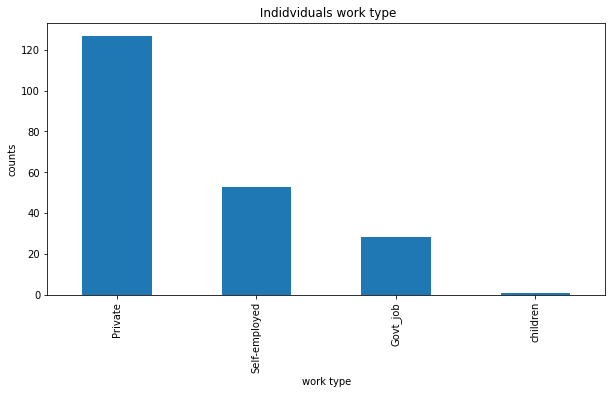

In [36]:
# Work type bar graph 

plt.figure(figsize=(10,5))
stroke['work_type'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title(' Indidviduals work type')
plt.xlabel('work type')

A higher % of people working in private sector were diagnosed with stroke.

Text(0.5, 0, 'smoking status')

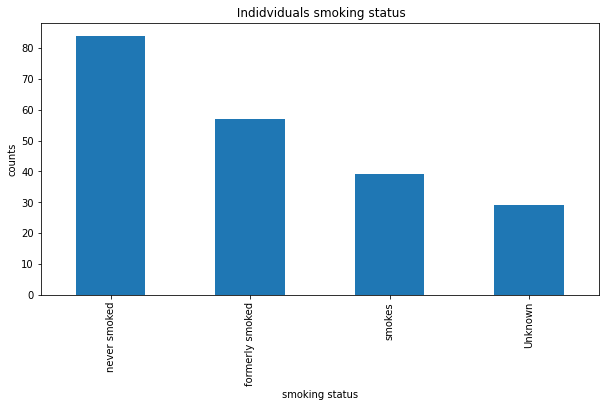

In [37]:
# Smoking status bar graph
plt.figure(figsize=(10,5))
stroke['smoking_status'].value_counts().plot(kind='bar')
plt.ylabel('counts')
plt.title(' Indidviduals smoking status')
plt.xlabel('smoking status')

Most of the respondents who never smoked had stroke.

#### Histograms

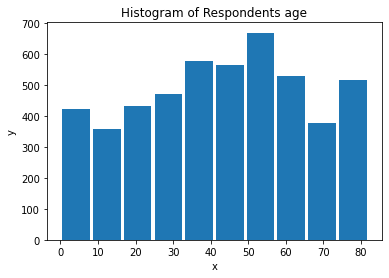

In [41]:
# Creating a histogram of respondents age
age = healthdata['age']

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of Respondents age') 
plt.show()

#### Measure of central tendency

In [42]:
healthdata.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


Mean


In [43]:
# Finding mean of the columns
print("The average of age is:",healthdata.age.mean())
print("The average of glucose level is:", healthdata.avg_glucose_level.mean())
print("The average of Bmi is:",healthdata.bmi.mean())

The average of age is: 42.865373803218596
The average of glucose level is: 105.30514972499458
The average of Bmi is: 28.893236911794673


Median

In [44]:
print("The median of age is:",healthdata.age.median())
print("The median of glucose level is:", healthdata.avg_glucose_level.median())
print("The median of Bmi is:",healthdata.bmi.median())

The median of age is: 44.0
The median of glucose level is: 91.68
The median of Bmi is: 28.1


Mode

In [46]:
print("The mode of age is:",healthdata.age.mode())

The mode of age is: 0    57.0
1    78.0
dtype: float64


In [47]:
print("The mode of glucose level is:", healthdata.avg_glucose_level.mode())

The mode of glucose level is: 0    93.88
dtype: float64


In [48]:
print("The mode of bmi is:",healthdata.bmi.mode())

The mode of bmi is: 0    28.7
dtype: float64


#### Measures of dispersion

Range




In [49]:
# Range of the age
age_max = healthdata['age'].max()
age_min = healthdata['age'].min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

82.0 0.08
81.92


In [50]:
# Range of the glucose leve;
age_max = healthdata.avg_glucose_level.max()
age_min = healthdata.avg_glucose_level.min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

271.74 55.12
216.62


In [51]:
# Range of the bmi;
age_max = healthdata.bmi.max()
age_min = healthdata.bmi.min()

age_range = age_max - age_min

print(age_max,age_min)
print(age_range)

97.6 10.3
87.3


Quantile

In [55]:
# Quantiles of the age,glucose level,bmi

print("Age:",healthdata.age.quantile([0.25,0.5,0.75]))


Age: 0.25    25.0
0.50    44.0
0.75    60.0
Name: age, dtype: float64


In [54]:
print("Glucose:",healthdata.avg_glucose_level.quantile([0.25,0.5,0.75]))


Glucose: 0.25     77.07
0.50     91.68
0.75    113.57
Name: avg_glucose_level, dtype: float64


In [53]:
print("BMI:",healthdata.bmi.quantile([0.25,0.5,0.75]))

BMI: 0.25    23.5
0.50    28.1
0.75    33.1
Name: bmi, dtype: float64


Standard deviation

In [56]:
# Standard Deviation of the age,glucose level,bmi

print("Age:",healthdata.age.std())
print("Glucose:",healthdata.avg_glucose_level.std())
print("BMI:",healthdata.bmi.std())

Age: 22.55511494800369
Glucose: 44.42434066091554
BMI: 7.854066729680158


Variance

In [57]:
# Variance of the age,bmi,glucoselevel

print("Age:",healthdata.age.var())
print("Glucose",healthdata.avg_glucose_level.var())
print("BMI",healthdata.bmi.var())

Age: 508.7332103176596
Glucose 1973.522043157074
BMI 61.68636419426877


Skewness

In [58]:
# Skewness of the age,BBMI,glucose

print("Age:",healthdata.age.skew())
print("Glucose",healthdata.avg_glucose_level.skew())
print("BMI",healthdata.bmi.skew())

Age: -0.11906951773810705
Glucose 1.6140261970592311
BMI 1.0553402052962928


- The age distribution is negatively skewed(left skewed).
- The Glucose and BMI distribution is positively skewed(Right skewed)

Kurtosis

In [59]:
# Kurtosis of the age,BMI, Glucose
print("Age:",healthdata.age.kurt())
print("Glucose",healthdata.avg_glucose_level.kurt())
print("BMI",healthdata.bmi.kurt())

Age: -0.9880907162494026
Glucose 1.905600727061806
BMI 3.362659165623678


- The glucose and Bmi distributions are highly peaked.
- The BMI distribution has heavier tail distribution than age and Glucose level.

### Bivariate Analysis

### Multivariate Analysis